**Assignment 2: Regression and classification**

***1. The dataset associated to this assignment was downloaded from www.hemnet.se on 2020-10-18. 
The data contains information about selling prices of villas in Landvetter that were sold in the past 12 months.***


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from scipy import 
from sklearn.model_selection import train_test_split
import seaborn as sns

df = pd.read_csv("data_assignment2.csv")

df

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000
5,6,133,6.0,823.0,NaN,12,6650000
6,7,70,4.0,1685.0,70.0,53,2800000
7,8,134,6.0,1593.0,49.0,57,6100000
8,9,70,5.0,1120.0,102.0,81,3000000
9,10,133,6.0,1503.0,NaN,51,3000000


***a. Find a linear regression model that relates the living area to the selling price. If you did any data cleaning step(s), describe and explain why you did that.***


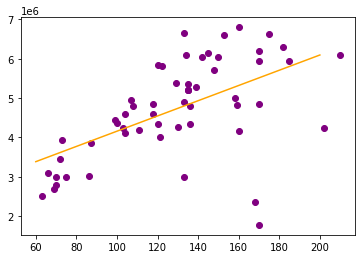

In [6]:
# get as an array([]) and an array()
X0 = df.loc[:, ['Living_area']].values
y0 = df['Selling_price']

#Generating a linear regression model, which is a line in this case
model0 = LinearRegression().fit(X0, y0)

#Plotting the regresion line
xfit0 = np.linspace(60, 200, 1000) #1000 evenly spaced points in [0, 55].
yfit0 = model0.predict(xfit0[:, np.newaxis])

plt.scatter(X0,y0, color='purple')
plt.plot(xfit0, yfit0, color='orange')
plt.show()


We plotted our data and saw some outlier values; values that was very far from the other values.

The biggest question we faced were "how many datapoints should we delete to get at more useful linear regression?"
One chould always be very careful cleaning out outliers. We decide to choose some outliers, but we want to still plot them to show the whole truth.

We chose our outliners from the measurment of the mean and standsard deviation, 
and basically just accepted twice our standard deviation because that gave us a few outliers but not to many.

Then we calculated the linear regression and plotted everything to verify our result.

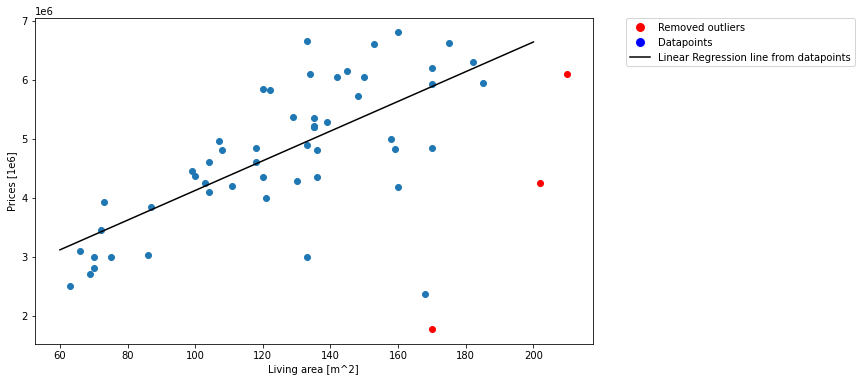

In [8]:
# get as an 2D array and an 1D array
area = df.loc[:, ['Living_area']].values
price = df['Selling_price']

# we determin outliners based on mean+2*standard deviation
lower_x = area.mean() - 2*area.std()
upper_x = area.mean() + 2*area.std()
lower_y = price.mean() - 2*price.std()
upper_y = price.mean() + 2*price.std()
areal = df['Living_area']

# find outliers
outliers_df = df[( (areal  > upper_x) | (areal  < lower_x) | (price > upper_y) | (price < lower_y) )]
x_outliers = outliers_df.loc[:, ['Living_area']]
y_outliers = outliers_df['Selling_price']

#remove outliers
filtered_df = df[( (areal   < upper_x) & (areal > lower_x) & (price < upper_y) & (price > lower_y))]
X = filtered_df.loc[:, ['Living_area']].values
y = filtered_df['Selling_price']

#Generating a linear regression model, which is a line in this case
model = LinearRegression().fit(X, y)
xfit = np.linspace(60, 200, 1000) #1000 evenly spaced points in [0, 55].
yfit = model.predict(xfit[:, np.newaxis])

# Create figure and axis objects with subplots('Horizontally stacked subplots' )
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.scatter(X,y)
ax1.scatter(x_outliers,y_outliers,color='red')
ax1.plot(xfit, yfit, color='black')
ax1.set_xlabel("Living area [m^2]")
ax1.set_ylabel("Prices [1e6]")
plt.title('')

#legend
l1 = Line2D([0],[0], marker='o', color='w', label='Removed outliers', markerfacecolor='red', markersize=10)
l2 = Line2D([0],[0], marker='o', color='w', label='Datapoints', markerfacecolor='blue', markersize=10)
l3 = Line2D([0],[0],  color='black', label='Linear Regression line from datapoints')

fig.legend(handles=[l1,l2,l3],bbox_to_anchor=(0.94,0.89), loc='upper left')
plt.show()

***b. What are the values of the slope and intercept of the regression line?***


In [ ]:
# Slope of the regression is the coeffictient of the model
print('Slope:', model.coef_[0])

# Intercept of the model by calling intercept_
print('Intercept:', model.intercept_ )

Slope: 25160.26380939493
Intercept: 1606573.8212559996


***c. Use this model to predict the selling prices of houses which have living area
100m^2 ,150m^" and 200m^2 .***

In [ ]:
# The areas that we want to predict as a 2D array
area_array = [[100], [150], [200]]

# Prediction for the areas using the linear regression model
predictions = model.predict(area_array)

print('Prediction of prices:')
print('100m2: %d' % pred[0], 'SEK')
print('150m2: %d' % pred[1], 'SEK')
print('200m2: %d' % pred[2], 'SEK')

Prediction of prices:
100m2: 4122600 SEK
150m2: 5380613 SEK
200m2: 6638626 SEK


***d. Draw a residual plot.***


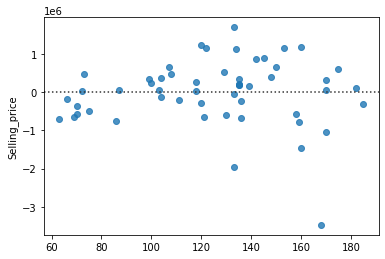

In [ ]:
""" 
Use seaborn's residual plot instead of re-inventing the wheel
While we could spend time on creating our own the same way
as we have done before with scatter and line plots, we felt
better to spend time on other parts. Needs to specify x and
y in order not to generate future warnings.
"""
sns.residplot(x=X, y=y)
plt.show()

***e. Discuss the results, and how the model could be improved.***

First question we are asking us, did the data cleaning do anything?

Let's examine if there were any difference, we'll both calculate the values and display them in a plot as
can bee seen below.


Slope unfilted: 19370
Slope filtered: 25160
Difference in slope: -5790
difference in intercept: 614029 


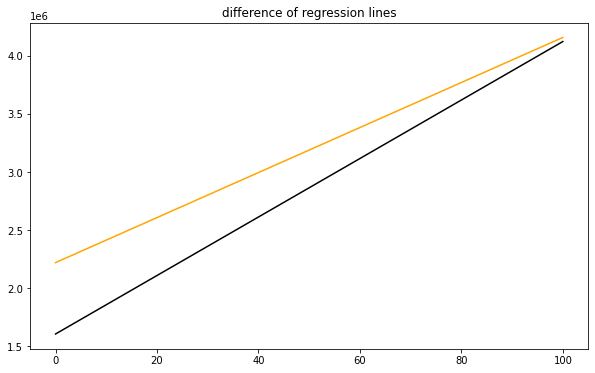

In [ ]:
# Slope of the regression is the coeffictient of the model
print('Slope unfiltered: %d' % model0.coef_[0])
print('Slope filtered: %d' % model.coef_[0])
print('Difference in slope: %d'  % (model0.coef_[0] - model.coef_[0]))
print('Difference in intercept: %d ' % (model0.intercept_ - model.intercept_) )


xfit00 = np.linspace(0, 100, 100) 
yfit00 = model0.predict(xfit00[:, np.newaxis])

xfit11 = np.linspace(0, 100, 100) 
yfit11 = model.predict(xfit11[:, np.newaxis])

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(xfit00, yfit00, color='orange')
ax1.plot(xfit11, yfit11, color='black')
plt.title('difference of regression lines')
plt.show()

We can see that the removal of the three outliers creates a different regression line, with a difference
in the interception of ~614000 SEK. It also meant that the outliers also changes the slope of
the regression with ~5790 SEK/m^2. This results in that for smaller m^2 values, the difference in
prices is very large, while for larger living areas it has similiar prices.


We conclude that our data cleaning made a difference, 
and maybe we could have cleaned some more to get it even better by 
using 2.5*mean+std_deviation instead of 2.
Or we could use a completely different way of picking out or outliners.
The model could been "improved" of we used a higher value for the standard
deviation from mean, for instance 3 or more. This would result that the
predictions would be closer to the actual values, but at the same time
the data being used to train the model doesn't represent the true data. 
This "improved" model would have an regression line that's closer to the 
actual values, but might not be better to predict a value that was prevously 
filtered away.

A different thought is that we maybe we should not get rid of outliers but manipulate their data to close the gap between them and the rest of the data. 
But this may lead to a much to sketchy approach.


If we look at our residual plot we got a mix belween a balanced residual and a high variance residual. 

Is our model too underfitted? If we were to adress all datapoints, the model could get too overfitted. 
But we could use a little more complex arbitrary base function, but that is something build in in the linear reagression method.

A balanced residual is proof that this method is perfect for this data, 
but since ours wasn't perfect balanced this could indicate that there would be a better method.

Maybe there is a hint of an unbalanced but not strong enought to give a strong indicator for using a different method. 
This could be something that would get better with more datacleaning.

In summary nothing strongly indicates that this i a bad method.




In task c we wanted to predict prices. 
The regression model could be more correctly made if it was done with splitting the dataset into 
a training part and a testing part. 
What we have now is just learning from 100% of our data and then predictiong 
totaly unknown data. We can never check how correct or wrong our guess was is so we can't know how good our prediciton is.
In task c we want to predict data that we already know and have used to build our model,
this is a bit ridiculous.


In order to have an accurate regression model, the prediction should be used on unkown sets.
In order to tell how good our model is we split our data. Then we can train our data and test it 
on new data, which we then can confirm our accuracy from the true results saved in our splitted test data.

Below is an example of how that would've been done, with the same model as previously demonstrated but tested on its
own values. 

In the example below it can be tested to see how good the predictions are for the regression model, which cannot be
done in the calculations for the previous questions since 

Mean squared error: 1940.164174960905


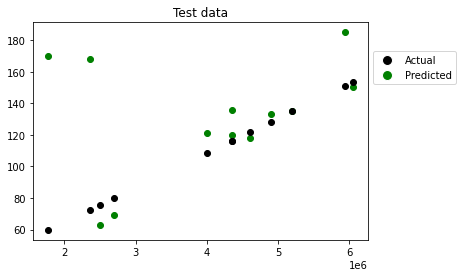

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# get as an array([])
X = df.loc[:, ['Selling_price']].values
y = df['Living_area']

#80 precent will be training values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# our train data will give us a linear regression model

#Generating a linear regression model, which is a line in this case
model = LinearRegression().fit(X_train, y_train)

#Plotting the regresion line
xfit = np.linspace(0, 7000000, 1000) #1000 evenly spaced points in [0, 55].
yfit = model.predict(xfit[:, np.newaxis])

# testing data
# testing how good our linear regression line is by predicting our test values 
y_pred = model.predict(X_test)

print('Mean squared error:', mean_squared_error(y_test, y_pred))

plt.scatter(X_test, y_test, color='green')
plt.scatter(X_test, y_pred, color='black')


#legend
l1 = Line2D([0],[0], marker='o', color='w', label='Actual', markerfacecolor='black', markersize=10)
l2 = Line2D([0],[0], marker='o', color='w', label='Predicted', markerfacecolor='green', markersize=10)
plt.legend(handles=[l1,l2],bbox_to_anchor=(1,0.89), loc='upper left')
plt.title('Test data')
plt.show()

To improve this even more we could split our data in different ways and maybe use a 10-fold cross-validation instead.

Another thought is to try a completely diffent method than linear regression and then compare the methods.


***2.In this question, you will use the Iris data set (“from sklearn.datasets import load_iris”). ***


In [15]:
from sklearn.datasets import load_iris


***a. Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set.***

***b. Use k-nearest neighbours to classify the iris data set with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger for the different cases? Why?***


***c. Compare the classification models for the iris data set that are generated by k-nearest neighbours (for the different settings from question 3) and by logistic regression. Calculate confusion matrices for these models and discuss the performance of the various models.***


***3. Explain why it is important to use a separate test (and sometimes validation) set.***

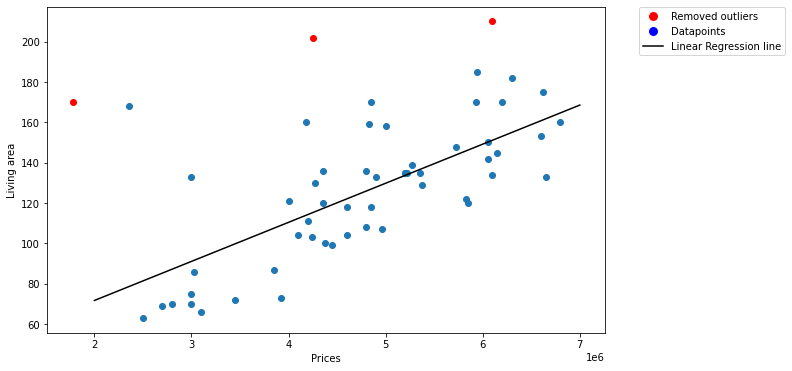

In [ ]:
# SAMMA SOM OVAN MEN ÅT ANDRA HÅLLET
# get as an array([]) and an array()
price = df.loc[:, ['Selling_price']].values
area = df['Living_area']

# find outliers according to our measurment using mean+standard deviation
outliers_df = df[(
    (df['Selling_price'] > (price.mean() + (2*price.std()))) | 
    (df['Selling_price'] < (price.mean() - (2*price.std()))) |
    (df['Living_area']   > (area.mean()  + (2*area.std()))) |
    (df['Living_area']   < (area.mean()  - (2*area.std()))))]
x_outliers = outliers_df.loc[:, ['Selling_price']]
y_outliers = outliers_df['Living_area']


#remove outliers
filtered_df = df[(
    (df['Selling_price'] < (price.mean()  + (2*price.std()))) & 
    (df['Selling_price'] > (price).mean() - (2*price.std())) &
    (df['Living_area']   < (area.mean()   + (2*area.std()))) &
    (df['Living_area']   > (area.mean()   - (2*area.std()))))]
X = filtered_df.loc[:, ['Selling_price']].values
y = filtered_df['Living_area']

#Generating a linear regression model, which is a line in this case
model = LinearRegression().fit(X, y)

#Plotting the regresion line
xfit = np.linspace(2000000, 7000000, 1000) #1000 evenly spaced points in [0, 55].
yfit = model.predict(xfit[:, np.newaxis])


# Create figure and axis objects with subplots('Horizontally stacked subplots' )
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.scatter(X,y)
ax1.scatter(x_outliers,y_outliers,color='red')
ax1.plot(xfit, yfit, color='black')
ax1.set_xlabel("Prices")
ax1.set_ylabel("Living area")
plt.title('')

#legend
l1 = Line2D([0],[0], marker='o', color='w', label='Removed outliers', markerfacecolor='red', markersize=10)
l2 = Line2D([0],[0], marker='o', color='w', label='Datapoints', markerfacecolor='blue', markersize=10)
l3 = Line2D([0],[0],  color='black', label='Linear Regression line')


fig.legend(handles=[l1,l2,l3],bbox_to_anchor=(0.94,0.89), loc='upper left')


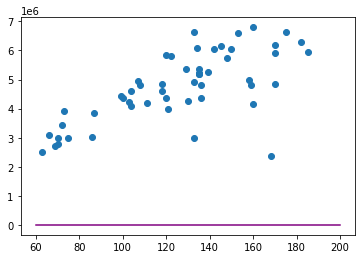

In [ ]:
X = df.loc[:, ['Selling_price']].values
y = df['Living_area'].values

#find outliers
meanX = X.mean() 
stndX = X.std()
meanY = y.mean() 
stndY = y.std()
lower_x = meanX - 2*stndX
upper_x = meanX + 2*stndX
lower_y = meanY - 2*stndY
upper_y = meanY + 2*stndY
price = df['Selling_price']
area = df['Living_area']

filtered_df = df[(
    (price < upper_x) &
    (price > lower_x) &
    (area  < upper_y) &
    (area  > lower_y))]

outliers_df = df[(
    (price > upper_x) |
    (price < lower_x) |
    (area  > upper_y) | 
    (area  < lower_y))]

# get prices as an 2D array, and areas as an array
X = filtered_df.loc[:, ['Living_area']].values
y = filtered_df['Selling_price']

# Create a model for Linear Regression
reg_model = LinearRegression().fit(X, y)

#Plotting the regresion line
x9fit = np.linspace(60, 200, 1000) #1000 evenly spaced points in [0, 55].
y9fit = model.predict(x9fit[:, np.newaxis])

plt.scatter(X,y)
plt.plot(x9fit, y9fit, color='purple')
plt.show()

[10, 20, 30, 50, 60]


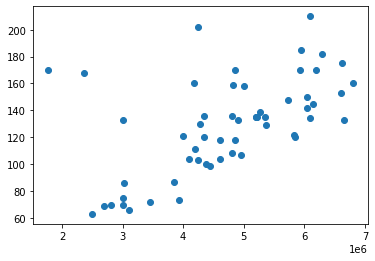

In [ ]:
#price = df['Selling_price'].to_numpy()
#area = df['Living_area'].to_numpy()

X = df.loc[:, ['Selling_price']].values
y = df['Living_area'].values
x = df['Selling_price'].values

plt.scatter(X, y)
#print(y)
data_test = [ 20, 20, 20, 21, 800]



data_test2 = [10,20,30,40,40,40,40,40,40,40,50,60]

def detect_outliers(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers
    
print(detect_outliers(data_test2))